In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [116]:
# List top two rows from Dataset and see 
df_airbnb=pd.read_csv("AB_NYC_2019.csv")
df_airbnb.head(2)

,id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Last_review,Reviews_per_month,Calculated_host_listings_count,Availability_365,Country,Property_type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365,US,Apartment
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355,US,Apartment


In [117]:
# No. of Rows & Columns
df_airbnb.shape

(48895, 18)

In [118]:
# Data types of every column
df_airbnb.dtypes

id                                  int64
Name                               object
Host_id                             int64
Host_name                          object
Neighbourhood_group                object
Neighbourhood                      object
Latitude                          float64
Longitude                         float64
Room_type                          object
Price                               int64
Minimum_nights                      int64
Number_of_reviews                   int64
Last_review                        object
Reviews_per_month                 float64
Calculated_host_listings_count      int64
Availability_365                    int64
Country                            object
Property_type                      object
dtype: object

In [119]:
# Looking to find out first what columns have null values
df_airbnb.isnull().sum()

id                                    0
Name                                 16
Host_id                               0
Host_name                            21
Neighbourhood_group                   0
Neighbourhood                         0
Latitude                              0
Longitude                             0
Room_type                             0
Price                                 0
Minimum_nights                        0
Number_of_reviews                     0
Last_review                       10052
Reviews_per_month                 10052
Calculated_host_listings_count        0
Availability_365                      0
Country                               0
Property_type                         0
dtype: int64

In [120]:
# Dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
df_airbnb.drop(['id','Host_name','Last_review'], axis=1, inplace=True)
df_airbnb.head(2)

,Name,Host_id,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count,Availability_365,Country,Property_type
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,US,Apartment
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,US,Apartment


In [121]:
# Reviews_per_month: Refill all NaN value to 0
df_airbnb.fillna({'Reviews_per_month':0}, inplace=True)
df_airbnb.Reviews_per_month.isnull().sum()

0

In [122]:
# Examining the unique values of Neighbourhood group
df_airbnb.Neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [123]:
# Examining the unique values of Neighbourhood
df_airbnb.Neighbourhood.unique()
len(df_airbnb.Neighbourhood.unique())

221

In [124]:
# Examining the unique values of Room_type
df_airbnb.Room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [125]:
top_host=df_airbnb.Host_id.value_counts().head(10)
top_host

Host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [126]:
# Coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=df_airbnb.Calculated_host_listings_count.max()
top_host_check

327

In [127]:
# Setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [128]:
df_top_host=pd.DataFrame(top_host)
df_top_host.reset_index(inplace=True)
df_top_host.rename(columns={'index':'Host_id', 'count':'P_Count'}, inplace=True)
df_top_host

,Host_id,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


C:\Users\User\AppData\Local\Temp\ipykernel_20876\1295515057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  airbnb_viz1=sns.barplot(x="Host_id", y="P_Count", data=df_top_host, palette='Blues_d')


C:\Users\User\AppData\Local\Temp\ipykernel_20876\1295515057.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  airbnb_viz1.set_xticklabels(airbnb_viz1.get_xticklabels(), rotation=45)


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

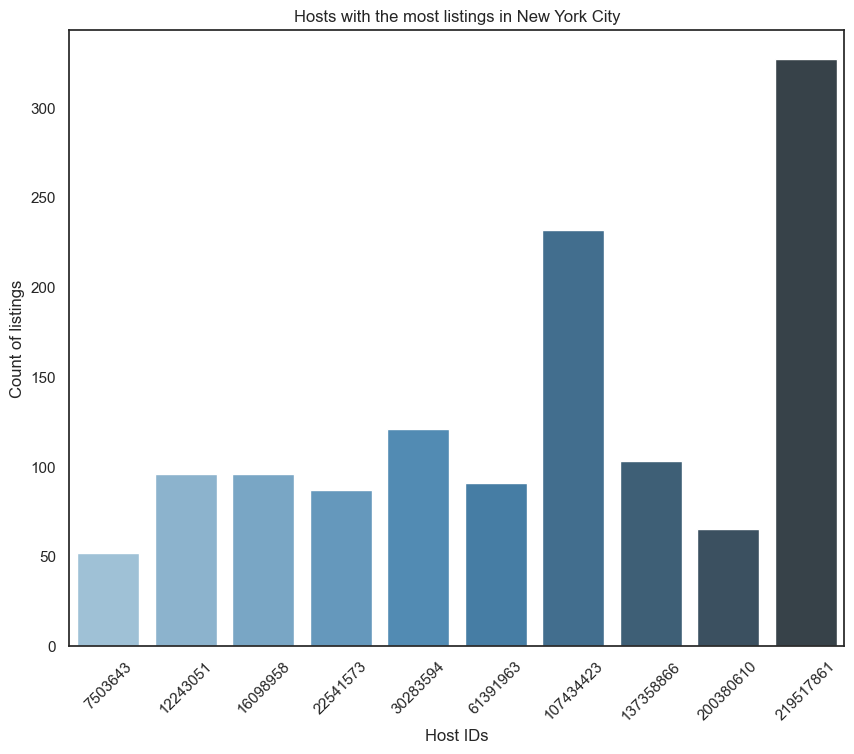

In [129]:
airbnb_viz1=sns.barplot(x="Host_id", y="P_Count", data=df_top_host, palette='Blues_d')
airbnb_viz1.set_title('Hosts with the most listings in New York City')
airbnb_viz1.set_ylabel('Count of listings')
airbnb_viz1.set_xlabel('Host IDs')
airbnb_viz1.set_xticklabels(airbnb_viz1.get_xticklabels(), rotation=45)

In [130]:
# Let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df_airbnb.loc[df_airbnb['Neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['Price']]
#Manhattan
sub_2=df_airbnb.loc[df_airbnb['Neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['Price']]
#Queens
sub_3=df_airbnb.loc[df_airbnb['Neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['Price']]
#Staten Island
sub_4=df_airbnb.loc[df_airbnb['Neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['Price']]
#Bronx
sub_5=df_airbnb.loc[df_airbnb['Neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['Price']]
#putting all the prices' dfs in the list
price_list_by_neiberhoods=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [131]:
# Creating an empty list that we will append later with price distributions for each Neighbourhood_group
price_list_by_neiberhoods_1=[]

# Creating list with known values in Neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_neiberhoods:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_list_by_neiberhoods_1.append(i)

# Changing names of the price column to the area name for easier reading of the table    
price_list_by_neiberhoods_1[0].rename(columns={'Price':nei_list[0]}, inplace=True)
price_list_by_neiberhoods_1[1].rename(columns={'Price':nei_list[1]}, inplace=True)
price_list_by_neiberhoods_1[2].rename(columns={'Price':nei_list[2]}, inplace=True)
price_list_by_neiberhoods_1[3].rename(columns={'Price':nei_list[3]}, inplace=True)
price_list_by_neiberhoods_1[4].rename(columns={'Price':nei_list[4]}, inplace=True)

# Finilizing our dataframe for final view    
stat_df=price_list_by_neiberhoods_1
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

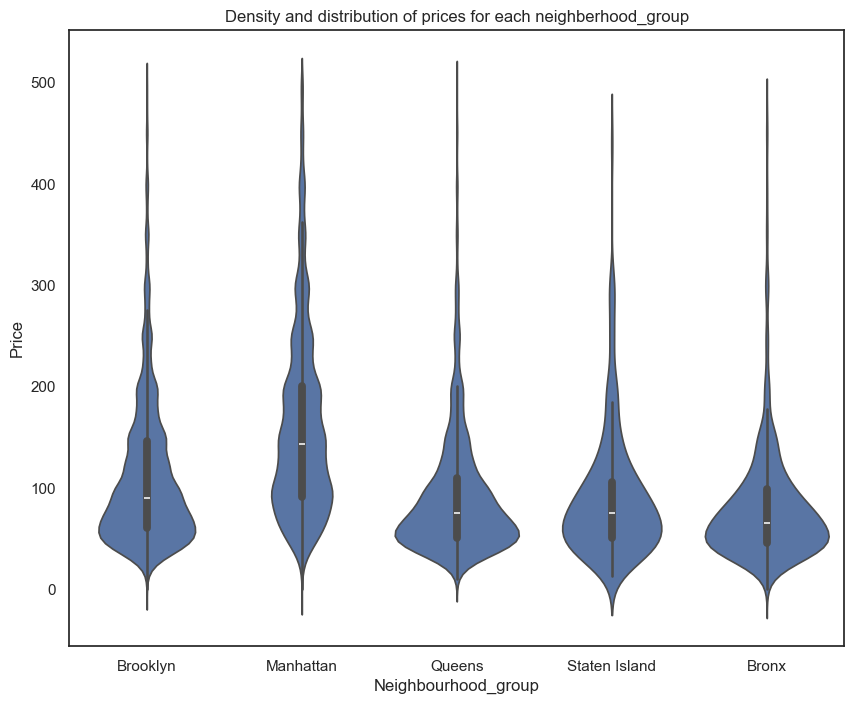

In [132]:
# We can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

# Creating a sub-dataframe with no extreme values / less than 500
sub_6=df_airbnb[df_airbnb.Price < 500]

# Using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='Neighbourhood_group', y='Price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [133]:
# As we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

# Finding out top 10 neighbourhoods
df_airbnb.Neighbourhood.value_counts().head(10)

Neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

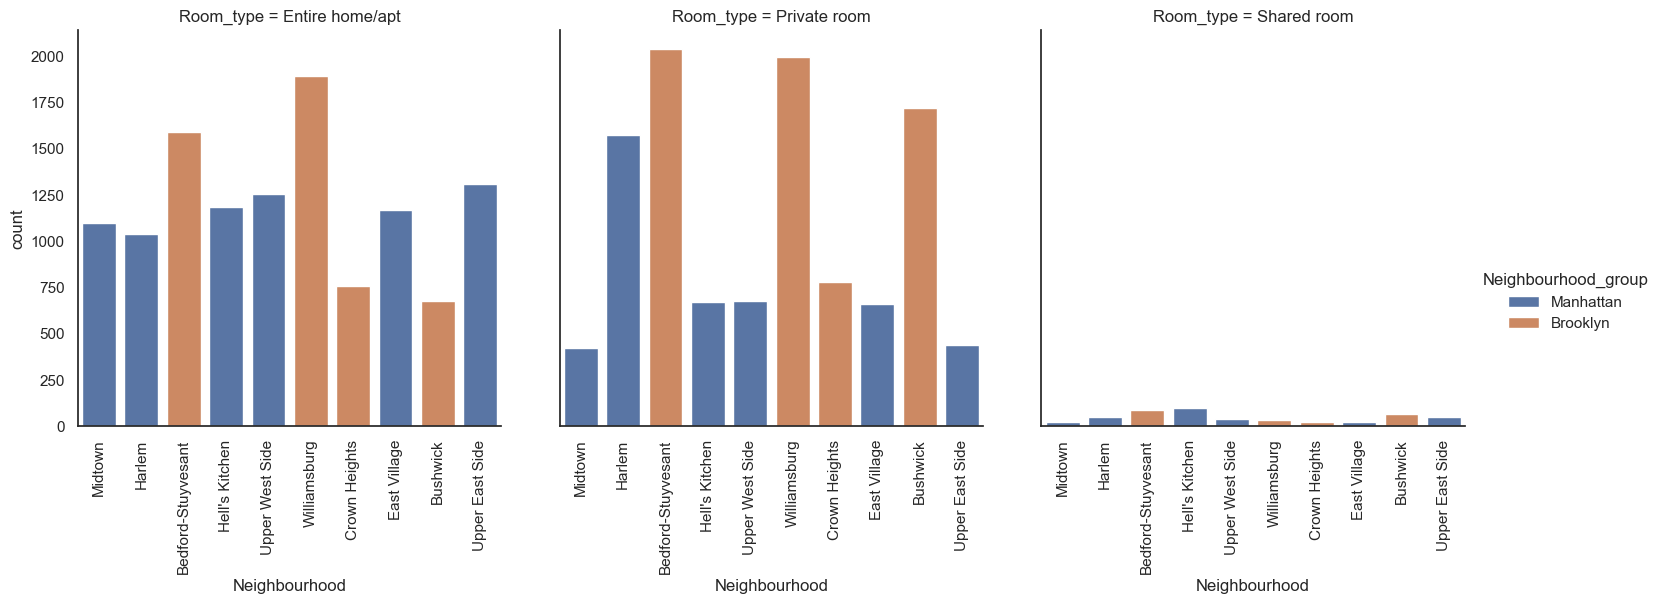

In [134]:
# Let's now combine this with our boroughs and room type for a rich visualization we can make

# Grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df_airbnb.loc[df_airbnb['Neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

# Using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='Neighbourhood', hue='Neighbourhood_group', col='Room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

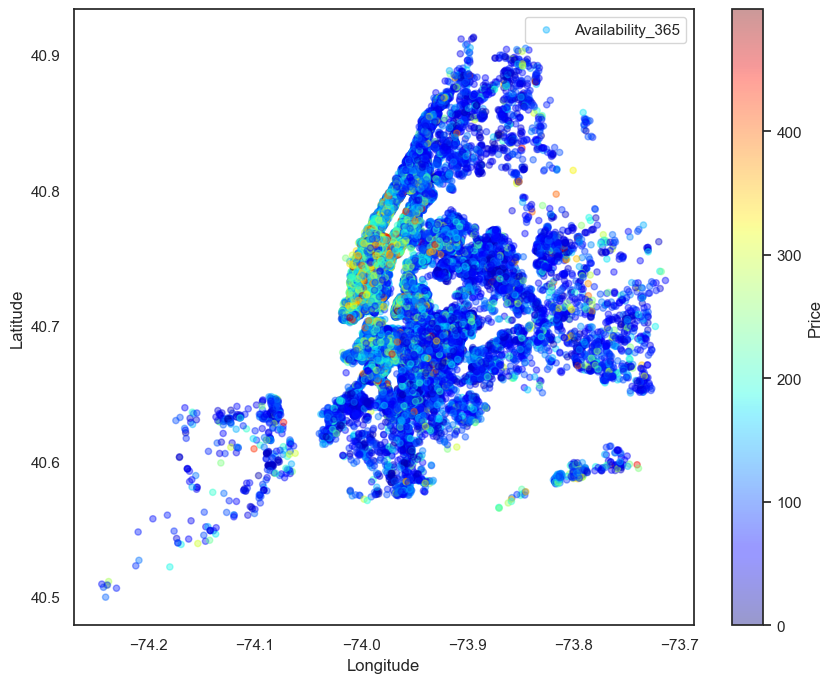

In [135]:
# Let's what we can do with our given longtitude and latitude columns

# Let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='Longitude', y='Latitude', label='Availability_365', c='Price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

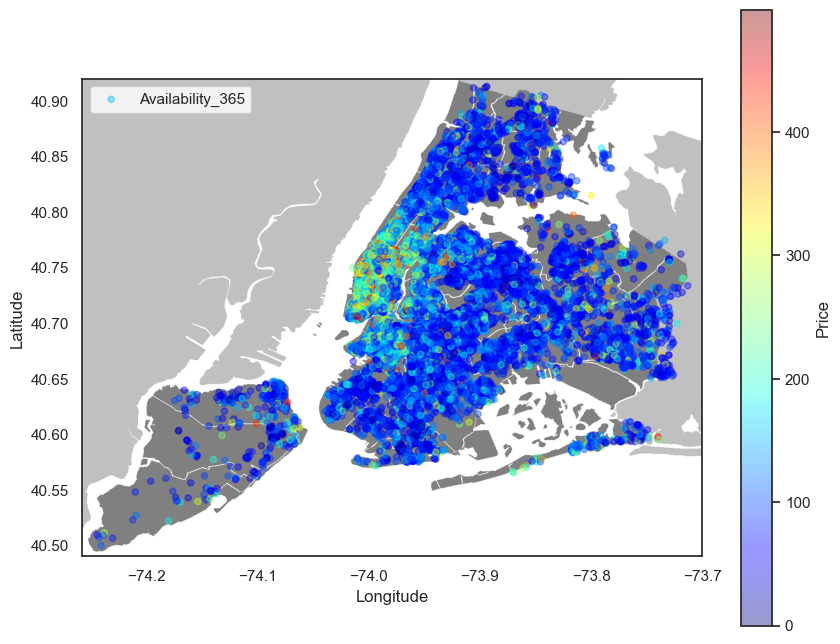

In [136]:
from skimage import io

# Initializing the figure size
plt.figure(figsize=(10,8))

# Loading the png NYC image found on Google and saving to my local folder along with the project
nyc_img = io.imread('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')

# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

# Using scatterplot again
sub_6.plot(kind='scatter', x='Longitude', y='Latitude', label='Availability_365', c='Price', ax=ax, 
          cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [137]:
# Let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

# Initializing empty list where we are going to put our name strings
_names_=[]

# Getting name strings from the column and appending it to the list
for name in df_airbnb.Name:
    _names_.append(name)

# Setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

# Initializing empty list where we are going to have words counted
_names_for_count_=[]

# Getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [138]:
# We are going to use counter
from collections import Counter

# Let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [139]:
# Now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_20876\212207979.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)


[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

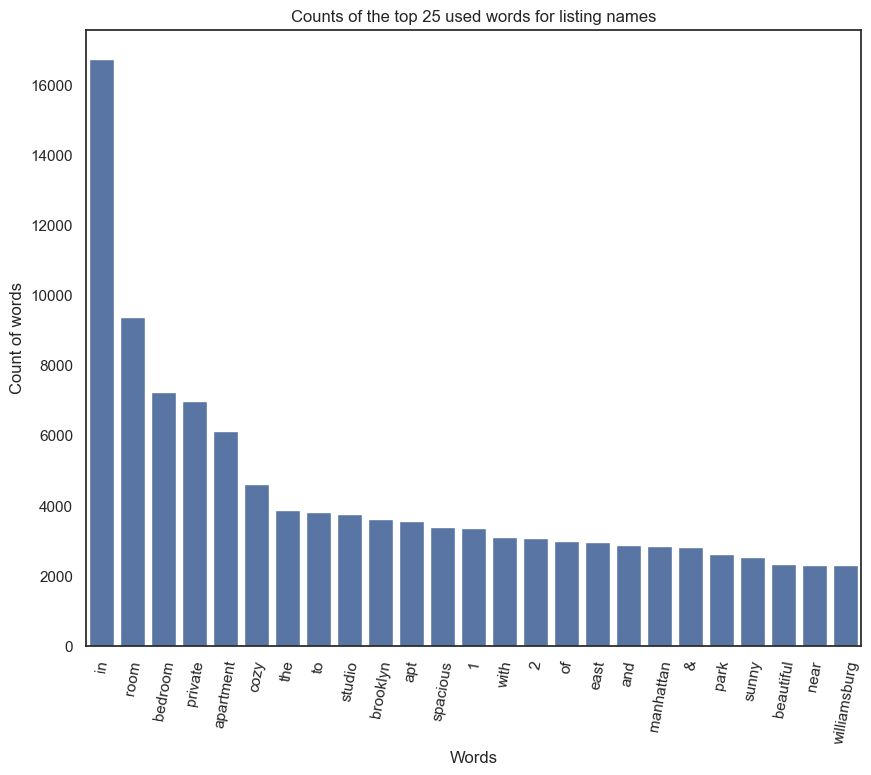

In [140]:
# We are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [141]:
# Last column we need to look at is 'number_of_reviews'

# Let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df_airbnb.nlargest(10,'Number_of_reviews')
top_reviewed_listings

,Name,Host_id,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count,Availability_365,Country,Property_type
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333,US,Apartment
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293,US,Apartment
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342,US,Apartment
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339,US,Apartment
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173,US,Apartment
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163,US,Apartment
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179,US,House
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341,US,Bed & Breakfast
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269,US,Apartment
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0,US,Apartment
